<a href="https://colab.research.google.com/github/MartinezJohan94/Matematicas_para_el_aprendizaje_de_maquinas/blob/main/Eigenfaces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Eigenfaces

El reconocimiento facial es un campo de estudio importante y más con el auge de la inteligencia artificial, deep learning y las redes neuronales. La capacidad de identificar y reconocer rostros humanos tiene diversas aplicaciones como lo pueden ser brindar o ayudar en entornos de seguridad hasta la autenticación biométrica. 
En el presente documento se aplicará el método de "Eigenfaces" para el problema de reconocimiento facial a partir de algunas características de los rostros que conforman la data de entrenamiento.

In [ ]:
# Import libraries
from matplotlib import pyplot as plt
from matplotlib.image import imread
import numpy as np
import os
from google.colab import drive
drive.mount('/content/drive')
data_wd ='/content/drive/MyDrive/MAyF/Aprendizaje de Máquinas/2023/Talleres y tareas/Eigenfaces/Train/'
Data_training  = os.listdir('/content/drive/MyDrive/MAyF/Aprendizaje de Máquinas/2023/Talleres y tareas/Eigenfaces/Train')

#Dimensiones de las imágenes
Ancho  = 195
Alto = 231


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Un primer paso es realizar la lectura y visualización de la data con la cual se trabajará. Dicha data se carga desde google drive, se puede consultar en el siguiente enlace (https://drive.google.com/drive/folders/1NZTiaYk01XuH_4IB1HKExw-nssg_kcEo?usp=share_link)

Dentro de esta data se consideran imágenes para el entrenamiento del algoritmo y otra propia para el testeo del mismo.

# Imágenes de Entrenamiento

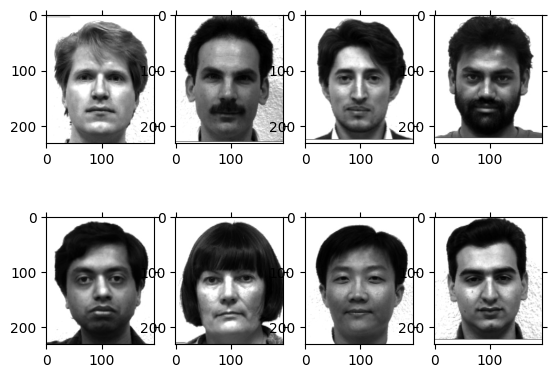

In [122]:
Imagenes_train = ['subject01.normal.jpg', 'subject02.normal.jpg', 'subject03.normal.jpg', 'subject07.normal.jpg', 'subject10.normal.jpg', 'subject11.normal.jpg', 'subject14.normal.jpg', 'subject15.normal.jpg']
tensor_train   = np.ndarray(shape=(len(Imagenes_train), Alto*Ancho), dtype=np.float64)
plt.imread(data_wd + Imagenes_train[1])
for i in range(len(Imagenes_train)):
    img = plt.imread(data_wd + Imagenes_train[i])
    tensor_train[i,:] = np.array(img, dtype='float64').flatten()
    plt.subplot(2,4,1+i)
    plt.imshow(img, cmap='gray')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

# Imágenes de Testeo

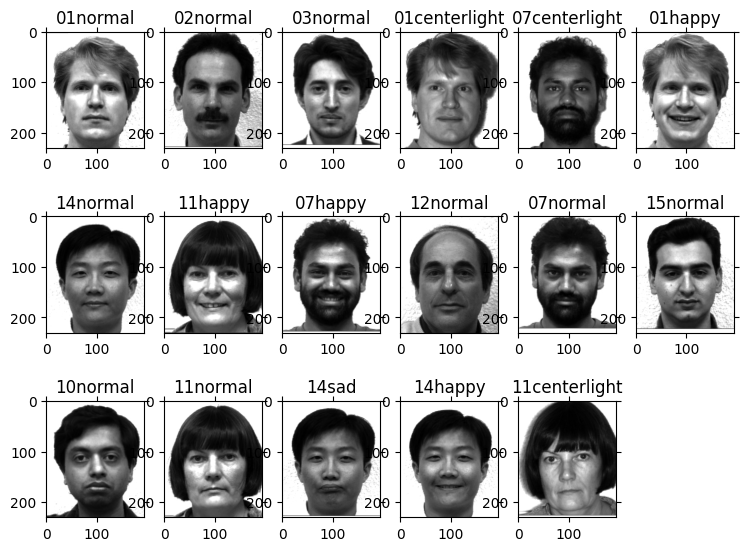

In [123]:

Imagenes_test = Data_training #[i for i in dataset_dir if i not in Imagenes_train]
tensor_test   = np.ndarray(shape=(len(Imagenes_test), Alto*Ancho), dtype=np.float64)

for i in range(len(Imagenes_test)):
    img = imread(data_wd + Imagenes_test[i])
    tensor_test[i,:] = np.array(img, dtype='float64').flatten()
    plt.subplot(3,6,1+i)
    plt.title(Imagenes_test[i].split('.')[0][-2:]+Imagenes_test[i].split('.')[1])
    plt.imshow(img, cmap='gray')
    plt.subplots_adjust(right=1.2, top=1.2)
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

A partir de la data de entrenamiento se obtiene el valor promedio de la data, esto es la "cara promedio" de los registros existentes.

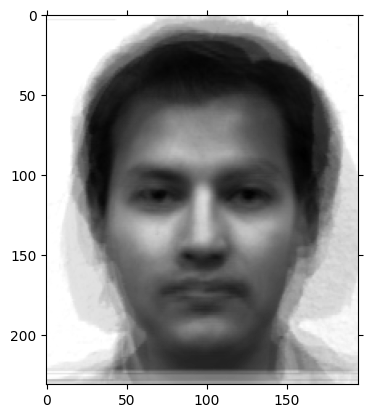

In [103]:
Cara_promedio = np.zeros((1,Alto*Ancho))

for i in tensor_train:
    Cara_promedio = np.add(Cara_promedio,i)

Cara_promedio = np.divide(Cara_promedio,float(len(Imagenes_train))).flatten()

plt.imshow(Cara_promedio.reshape(Alto, Ancho), cmap='gray')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

Teniendo este 'promedio' se realiza una normalización de las imágenes de rostros que se tienen en la data de entrenamiento y se visualizan los resultados de este procedimiento.

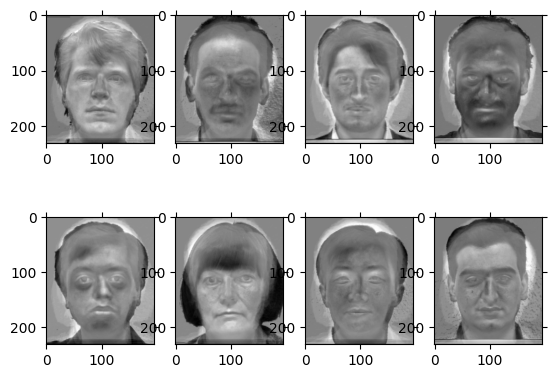

In [156]:
tensor_train_normalizado = np.ndarray(shape=(len(Imagenes_train), Alto*Ancho))

for i in range(len(Imagenes_train)):
    tensor_train_normalizado[i] = np.subtract(tensor_train[i],Cara_promedio)

for i in range(len(Imagenes_train)):
    img = tensor_train_normalizado[i].reshape(Alto,Ancho)
    plt.subplot(2,4,1+i)
    plt.imshow(img, cmap='gray')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

Debido a que se quiere encontrar la 'base' de este espacio, se realiza el cálculo de la matriz de covarianza de dichas imágenes normalizadas para posteriormente calcular los valores y vectores propios de la misma

In [157]:
cov_matrix = np.cov(tensor_train_normalizado)
cov_matrix = np.divide(cov_matrix,8.0)
eigenvalores, eigenvectores, = np.linalg.eig(cov_matrix)
#print('Matriz de covarianza de X: \n%s' %cov_matrix)
#print('Eigenvectores of Cov(X): \n%s' %eigenvectores)
#print('\nEigenvalores of Cov(X): \n%s' %eigenvalores)

Teniendo los valores y vectores propios se construye una lista con los valores propios correspondientes a cada vector propio. Adicionalmente, se organizan de manera descendiente

In [109]:
eig_parejas = [(eigenvalores[index], eigenvectores[:,index]) for index in range(len(eigenvalores))]

# Se ordenan las parejas de valores y vectores propios de manera descendiente
eig_parejas.sort(reverse=True)
eigvalores_ord  = [eig_parejas[index][0] for index in range(len(eigenvalores))]
eigvectores_ord = [eig_parejas[index][1] for index in range(len(eigenvalores))]

Ya con los datos ordenados, se halla la varianza acumulada para cada uno de los componentes o características principales 

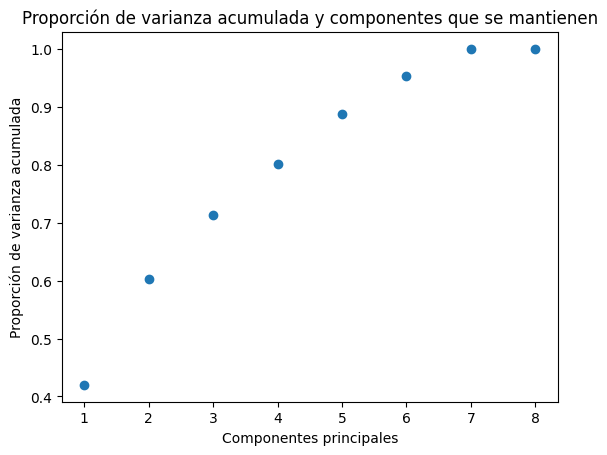

In [158]:
var_comp_sum = np.cumsum(eigvalores_ord)/sum(eigvalores_ord)

# Eje x para el número de componentes principales que se mantienen
num_comp = range(1,len(eigvalores_ord)+1)
plt.title('Proporción de varianza acumulada y componentes que se mantienen')
plt.xlabel('Componentes principales')
plt.ylabel('Proporción de varianza acumulada')

plt.scatter(num_comp, var_comp_sum)
plt.show()

Ahora, se construye el espacio con los componentes principales o 'eigenespacio' así como los pesos para cada una de las imágenes.

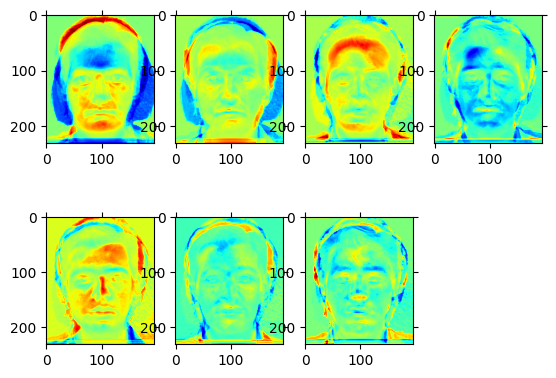

In [159]:
Data_reducida = np.array(eigvectores_ord[:7]).transpose()
proj_data = np.dot(tensor_train.transpose(),Data_reducida)
proj_data = proj_data.transpose()

for i in range(proj_data.shape[0]):
    img = proj_data[i].reshape(Alto,Ancho)
    plt.subplot(2,4,1+i)
    plt.imshow(img, cmap='jet')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()
w = np.array([np.dot(proj_data,i) for i in tensor_train_normalizado])

Ahora, se realizará el reconocimiento de una nueva imagen y rostro.

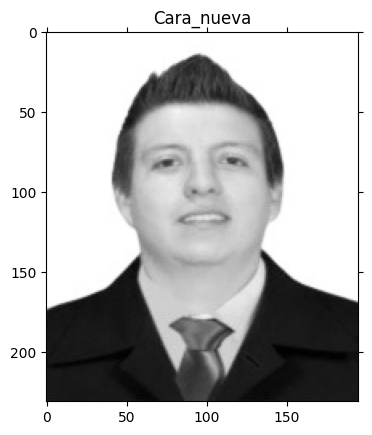

In [174]:
Cara_nueva        = plt.imread('/content/drive/MyDrive/MAyF/Aprendizaje de Máquinas/2023/Talleres y tareas/Eigenfaces/Test/Johan.jpeg')
Vector_cara_nueva = np.array(Cara_nueva, dtype='float64').flatten()

plt.imshow(Cara_nueva, cmap='gray')
plt.title('Cara_nueva')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

A este nuevo rostro se le realiza el proceso de normalización y se calculan los pesos correspondientes de la imagen para el algoritmo

In [162]:
#from PIL import Image
#image=Image.open("/content/drive/MyDrive/MAyF/Aprendizaje de Máquinas/2023/Talleres y tareas/Eigenfaces/Test/Johan.jpeg")
#width, height = image.size
#print("Ancho:", width)
#print("Altura:", height)
#image
#np.array(Cara_nueva, dtype='float64').flatten()

Ancho: 195
Altura: 231


array([74., 88., 82., ..., 17., 14., 11.])

In [173]:
Vector_Cara_Nueva_Norm = np.subtract(Vector_cara_nueva,Cara_promedio)

plt.imshow(Vector_Cara_Nueva_Norm.reshape(Alto, Ancho), cmap='gray')
plt.title('Vector_Cara_Nueva_Normalizada')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

w_desc = np.dot(proj_data, Vector_cara_nueva)

Posteriormente, se realiza la optimización del mismo calculando $min|w-w_{nuevo}|$

In [167]:
diferencia  = w - w_desc
normas = np.linalg.norm(diferencia, axis=1)

Finalmente, se realiza el reconocimiento de todas las imágenes de prueba. Para ello, primero se realiza la visualización de las mismas y se analiza si la imagen corresponde o no a un rostro. 

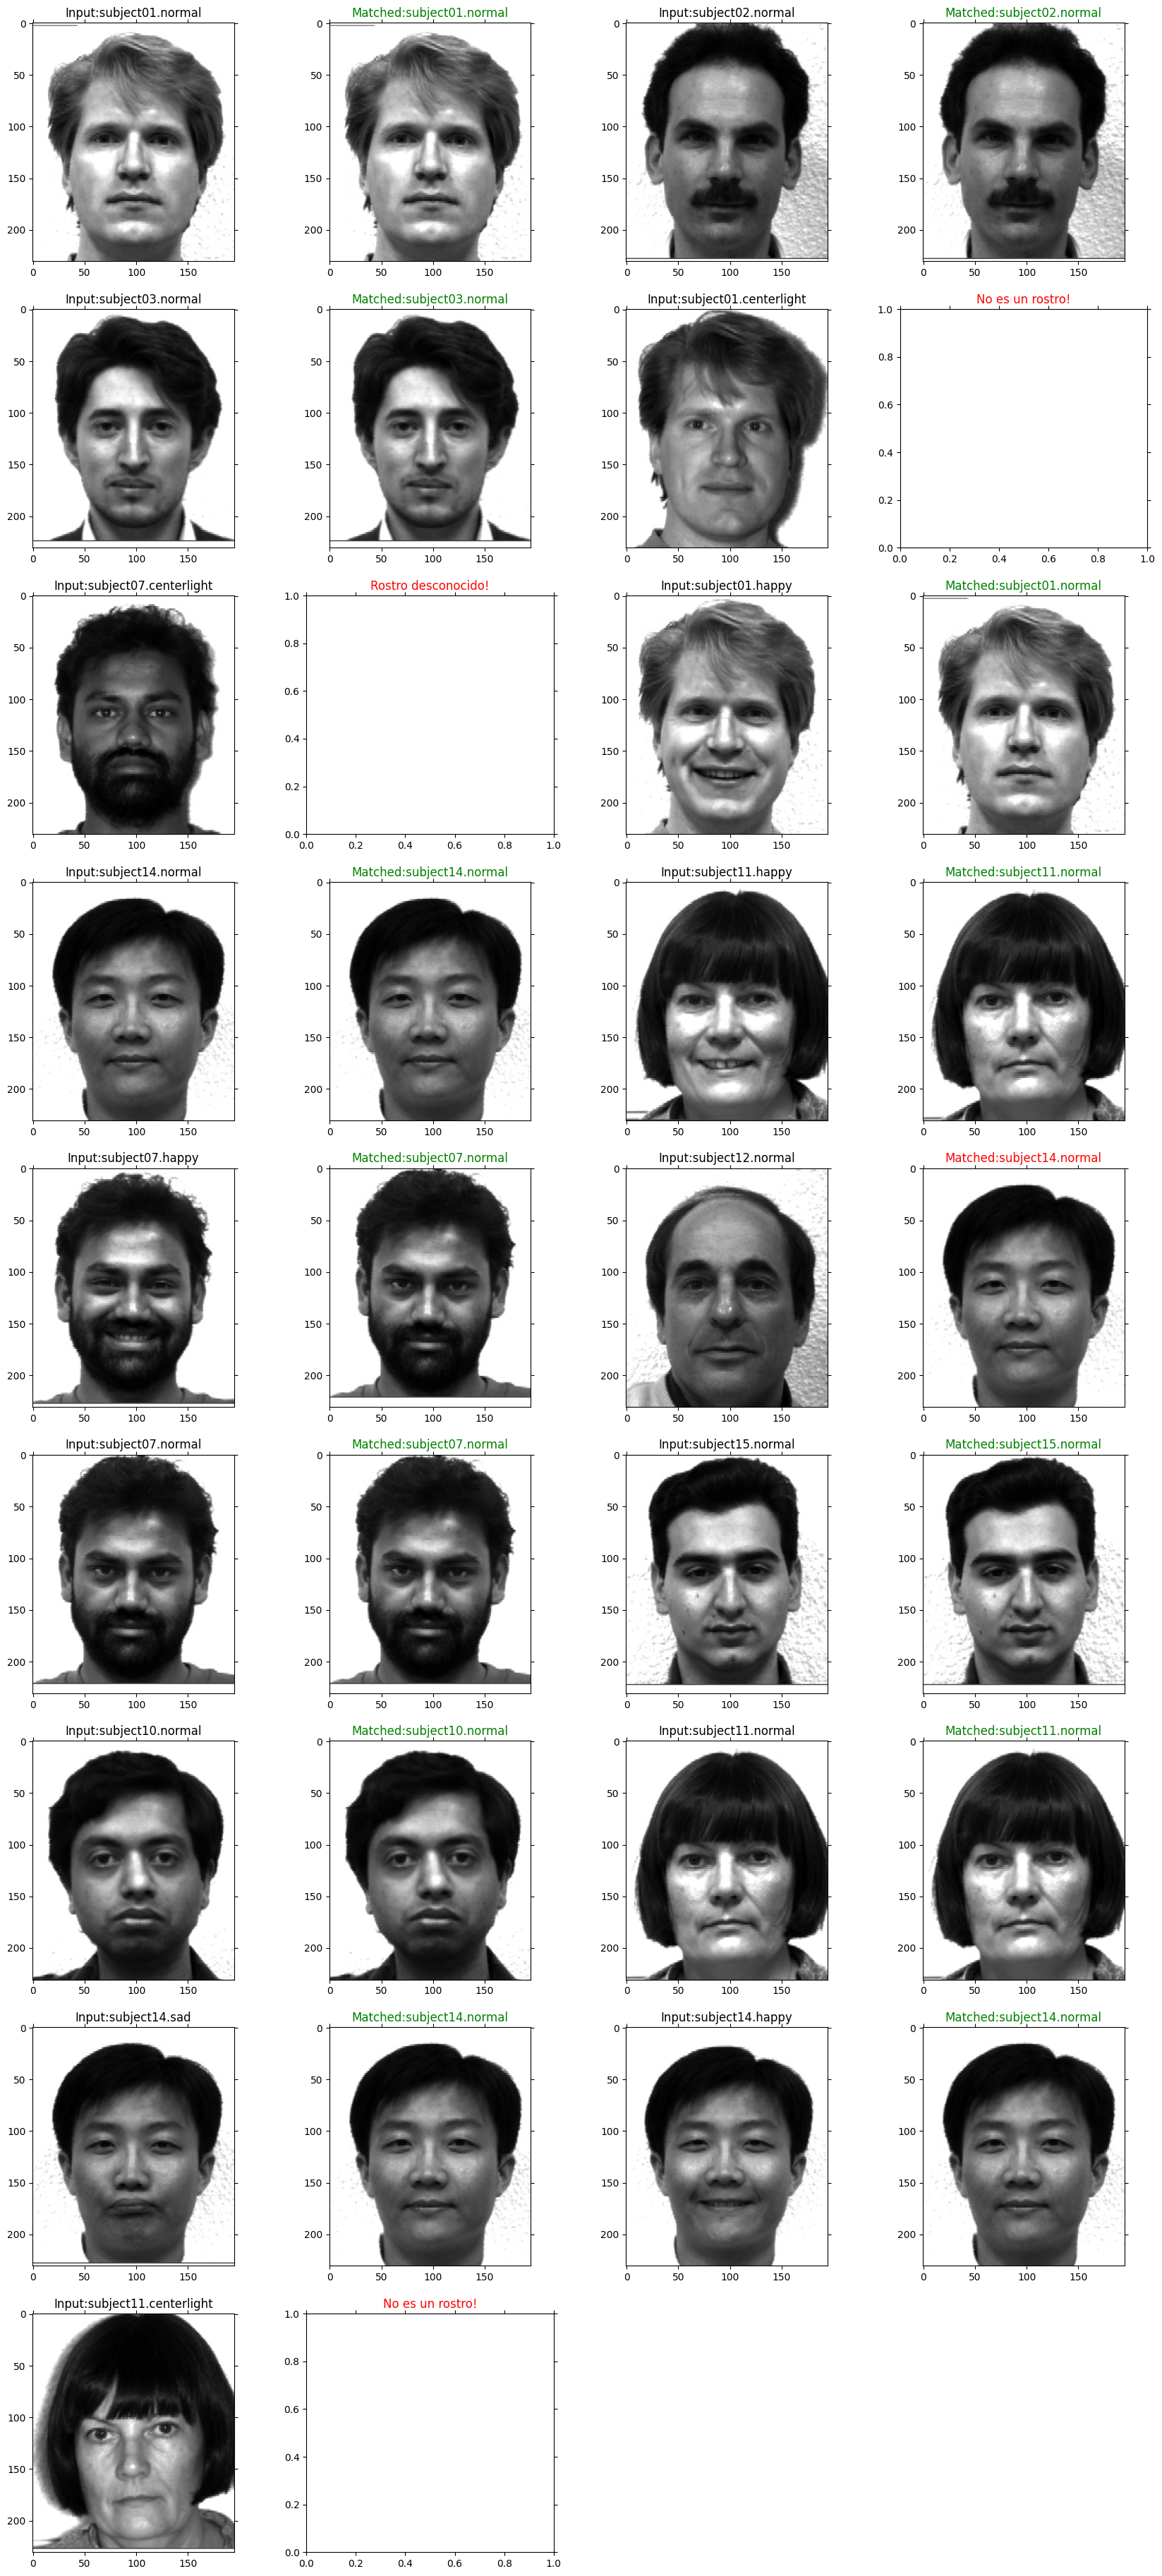

Predicciones correctas: 13/17 = 76.47058823529412%


In [120]:
conteo       = 0 
num_images   = 0
correct_pred = 0
def recogniser(img, train_image_names,proj_data,w):
    global conteo,highest_min,num_images,correct_pred
    Cara_nueva        = plt.imread('/content/drive/MyDrive/MAyF/Aprendizaje de Máquinas/2023/Talleres y tareas/Eigenfaces/Train/'+img)
    num_images          += 1
    Vector_cara_nueva = np.array(Cara_nueva, dtype='float64').flatten()
    Vector_Cara_Nueva_Norm = np.subtract(Vector_cara_nueva,Cara_promedio)
    
    plt.subplot(9,4,1+conteo)
    plt.imshow(Cara_nueva, cmap='gray')
    plt.title('Input:'+'.'.join(img.split('.')[:2]))
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
    conteo+=1
    
    w_desc = np.dot(proj_data, Vector_Cara_Nueva_Norm)
    diferencia  = w - w_desc
    normas = np.linalg.norm(diferencia, axis=1)
    index = np.argmin(normas)
    
    t1 = 100111536
    #t1 = 200535910.268 # working with 6 faces
    #t0 = 86528212
    t0 = 88831687
    #t0 = 143559033 # working with 6 faces
    
    if normas[index] < t1:
        plt.subplot(9,4,1+conteo)
        if normas[index] < t0: # It's a face
            if img.split('.')[0] == Imagenes_train[index].split('.')[0]:
                plt.title('Matched:'+'.'.join(Imagenes_train[index].split('.')[:2]), color='g')
                plt.imshow(imread('/content/drive/MyDrive/MAyF/Aprendizaje de Máquinas/2023/Talleres y tareas/Eigenfaces/Train/'+Imagenes_train[index]), cmap='gray')
                
                correct_pred += 1
            else:
                plt.title('Matched:'+'.'.join(Imagenes_train[index].split('.')[:2]), color='r')
                plt.imshow(imread('/content/drive/MyDrive/MAyF/Aprendizaje de Máquinas/2023/Talleres y tareas/Eigenfaces/Train/'+Imagenes_train[index]), cmap='gray')
        else:
            if img.split('.')[0] not in [i.split('.')[0] for i in Imagenes_train] and img.split('.')[0] != 'apple':
                plt.title('Rostro desconocido!', color='g')
                correct_pred += 1
            else:
                plt.title('Rostro desconocido!', color='r')
        plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
        plt.subplots_adjust(right=1.2, top=2.5)
    else:     
        plt.subplot(9,4,1+conteo)
        if len(img.split('.')) == 3:
            plt.title('No es un rostro!', color='r')
        else:
            plt.title('No es un rostro!', color='g')
            correct_pred += 1
        plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
    conteo+=1

fig = plt.figure(figsize=(15, 15))
for i in range(len(Imagenes_test)):
    recogniser(Imagenes_test[i], Imagenes_train,proj_data,w)

plt.show()

print('Predicciones correctas: {}/{} = {}%'.format(correct_pred, num_images, correct_pred/num_images*100.00))

Finalmente, se realiza el proceso de normalización y 'descomposición' de cada rostro en las diferentes 'eigenfaces' o características más importantes halladas anteriormente.

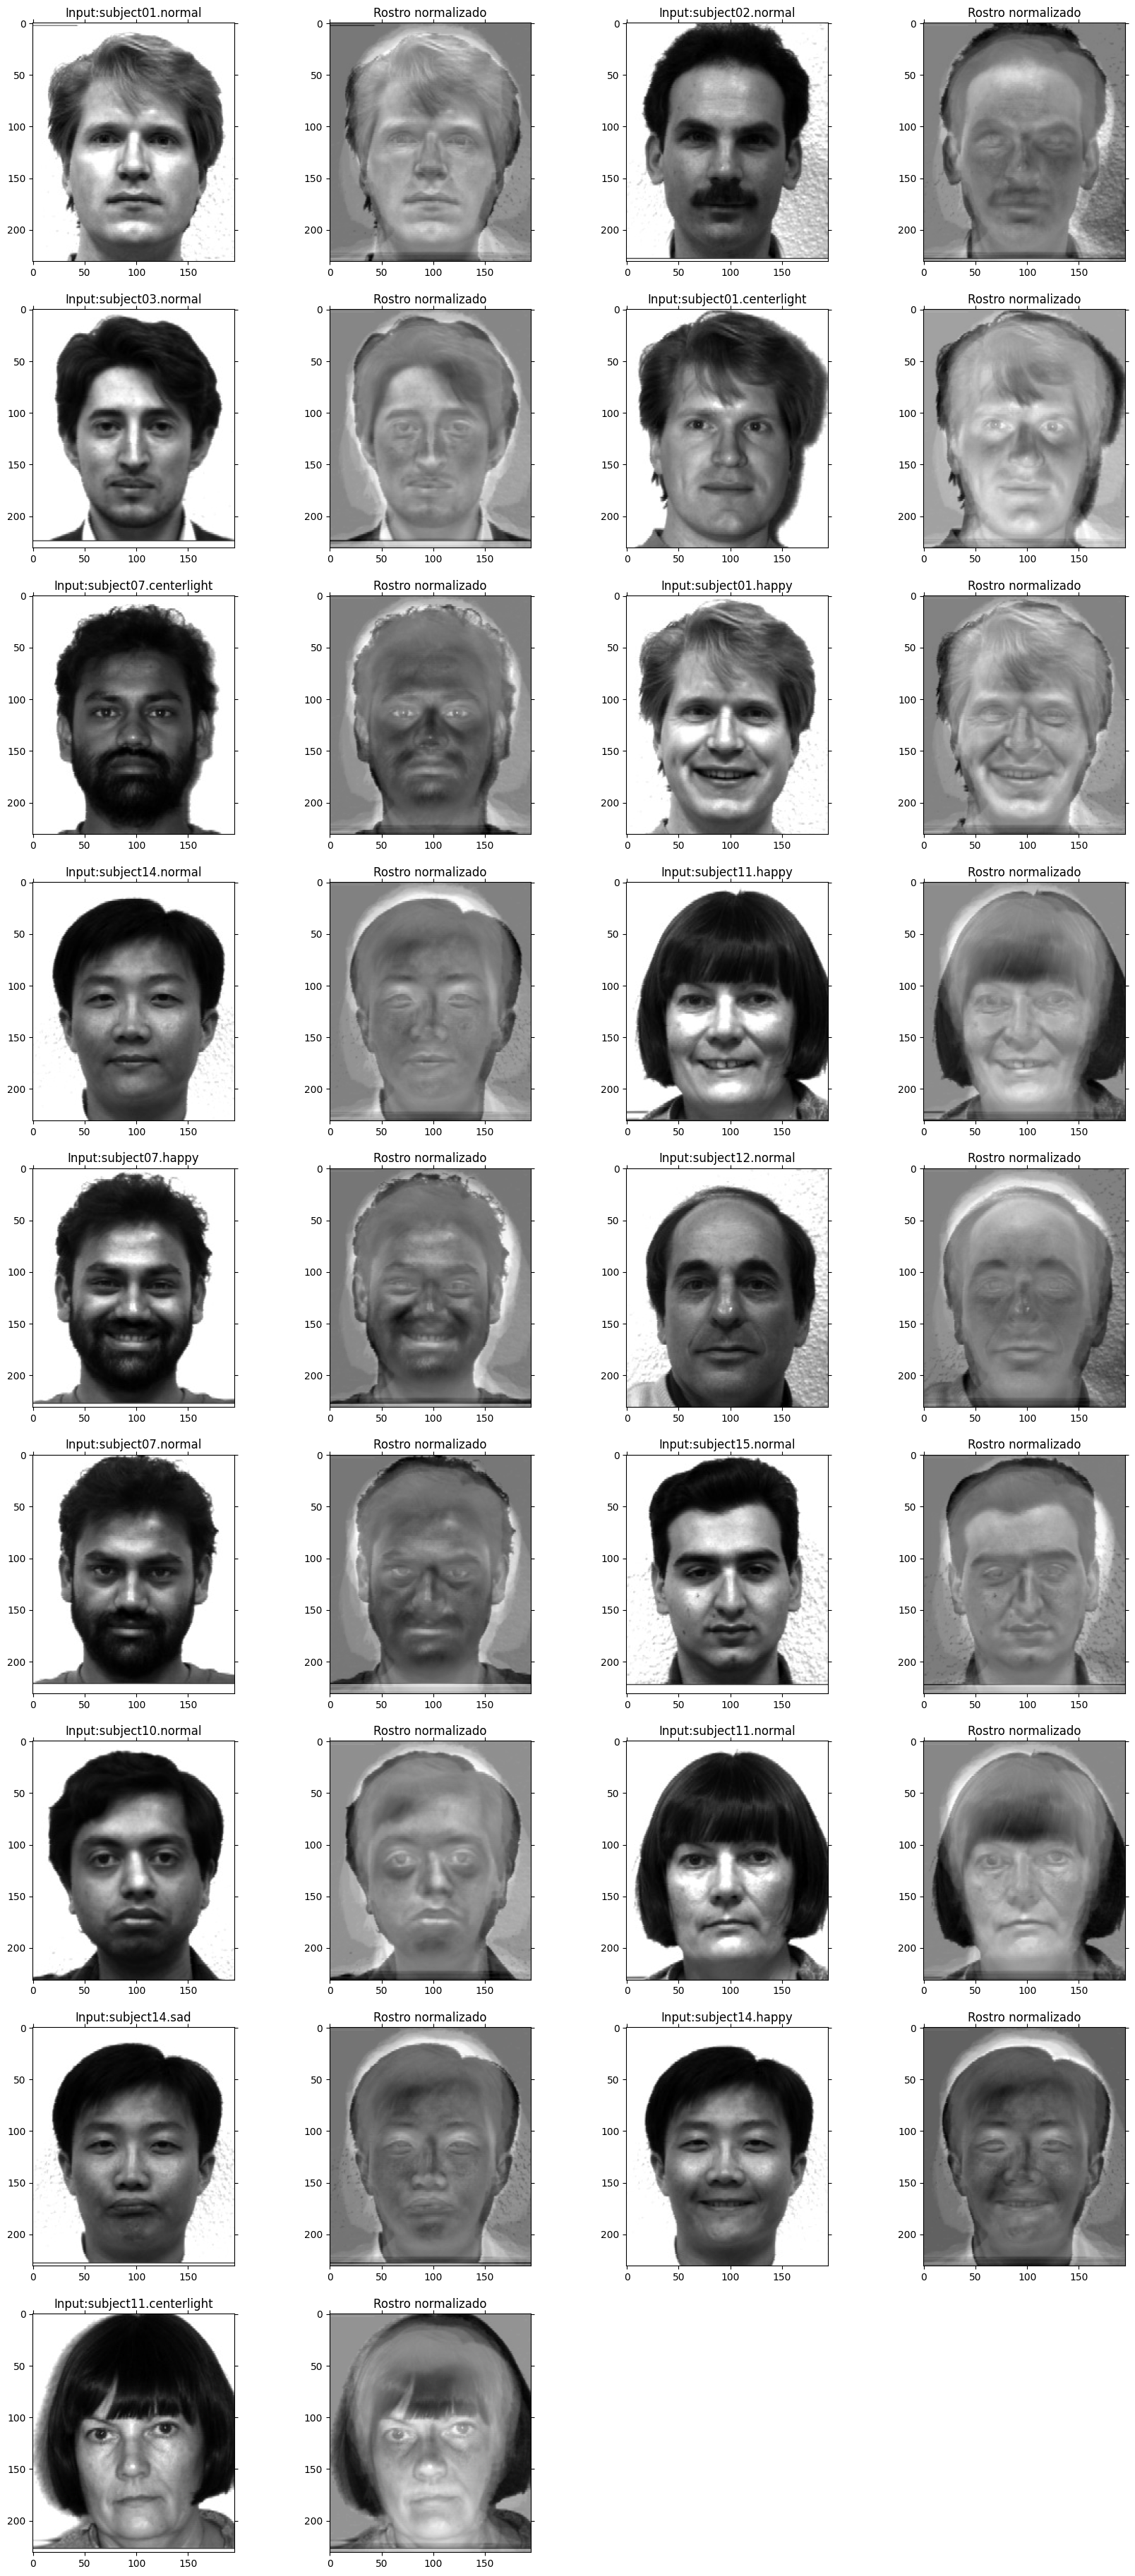

In [121]:
conteo       = 0
def recogniser(img, train_image_names,proj_data,w):
    global conteo
    Cara_nueva        = plt.imread('/content/drive/MyDrive/MAyF/Aprendizaje de Máquinas/2023/Talleres y tareas/Eigenfaces/Train/'+img)
    Vector_cara_nueva = np.array(Cara_nueva, dtype='float64').flatten()
    Vector_Cara_Nueva_Norm = np.subtract(Vector_cara_nueva,Cara_promedio)
    
    plt.subplot(9,4,1+conteo)
    plt.imshow(Cara_nueva, cmap='gray')
    plt.title('Input:'+'.'.join(img.split('.')[:2]))
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
    conteo+=1
    
    plt.subplot(9,4,1+conteo)
    plt.imshow(Vector_Cara_Nueva_Norm.reshape(height, width), cmap='gray')
    plt.title('Rostro normalizado')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
    plt.subplots_adjust(right=1.2, top=2.5)
    conteo+=1

fig = plt.figure(figsize=(15, 15))
for i in range(len(Imagenes_test)):
    recogniser(Imagenes_test[i], Imagenes_train,proj_data,w)

plt.show()